<div class="alert alert-warning">

**Source Material**:

The following exercises are adapted from Chapter 7 of [Mark Newman's book, "Computational Physics"](http://www-personal.umich.edu/~mejn/cp/)

</div>


<!-- #region {"code_folding": [0, 11]} -->
# Exercises: Basics of DFTs

<!-- #endregion -->

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Tuple, Sequence

%matplotlib notebook

(1.4.1) Write a function that performs a discrete Fourier transform on a *real-valued* signal containing $N$ samples: 
$(y_n)_{n=0}^{N-1} \rightarrow  (c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$

This should produce identical results to `numpy.fft.rfft`.

In [3]:
def py_dft(samples: Sequence[float]) -> np.ndarray:
    """Performs a Discrete Fourier Transform (type-1) for 
    real-valued data.
        
    Parameters
    ----------
    samples : Sequence[float]
        N evenly-spaced, real-valued numbers

    Returns
    -------
    numpy.ndarray, shape-(N//2 + 1,)
        The N//2 + 1 complex-valued Fourier coefficients describing `samples`"""
    
    # <COGINST>
    N = len(samples)
    coefs = np.zeros(N // 2 + 1, dtype=complex)
    const = -1 * np.pi / N * 2j
    for k in range(N // 2 + 1):
        for n in range(N):
            coefs[k] += samples[n] * np.exp(const * k * n)
    return np.array(coefs)
    # </COGINST>

Consider the sine wave with frequency $f$

\begin{equation}
g(t) = \sin(2 \pi f t)
\end{equation}

Let's assume that $f = \frac{1}{150}\;\mathrm{Hz}$ (recall: $\mathrm{Hz}=\frac{1}{\mathrm{seconds}}$).
Thus the period of the wave is $T_{\text{period}} = 1/f = 150$ seconds.

(1.4.2) Using Euler's formula, $e^{ix} = \cos{x} + i\sin{x}$, write this sine wave in terms of complex-valued exponentials (i.e. using $e^{ix}$).
Notice that this represents a very simple Fourier series, one in which only a single frequency is present.

> 1.4.2 Solution: <COGINST>$g(t) = \frac{1}{2i}e^{i 2 \pi f t} + \frac{-1}{2i}e^{-i 2 \pi f t}$</COGINST>


(1.4.3) Take $N=100$ samples of this sine wave over four complete periods of oscillation.
That is, create an array of $t_{n} = \frac{n}{N}T$ for $n = 0, 1, ... N-1$, where $T = 4T_{\text{period}}$, and create a corresponding array of $y_{n} = f(t_{n})$ .

In [4]:
# <COGINST>
f = 1 / 150  # Hz
T = 4 * (1 / f)  # length of sample (seconds)
N = 100  # number of samples
t_samples = np.arange(N) * (T / N)  # the samples, in seconds
y_samples = np.sin(2 * np.pi * f * t_samples)
# </COGINST>

<!-- #region -->
Now plot the sampled signal, $y_{n}$, based on the following code.

In [ ]:
fig, ax = plt.subplots()
ax.plot(t, samples, marker='x')
ax.grid()
ax.set_xlabel("t (seconds)")

<!-- #endregion -->

<IPython.core.display.Javascript object>


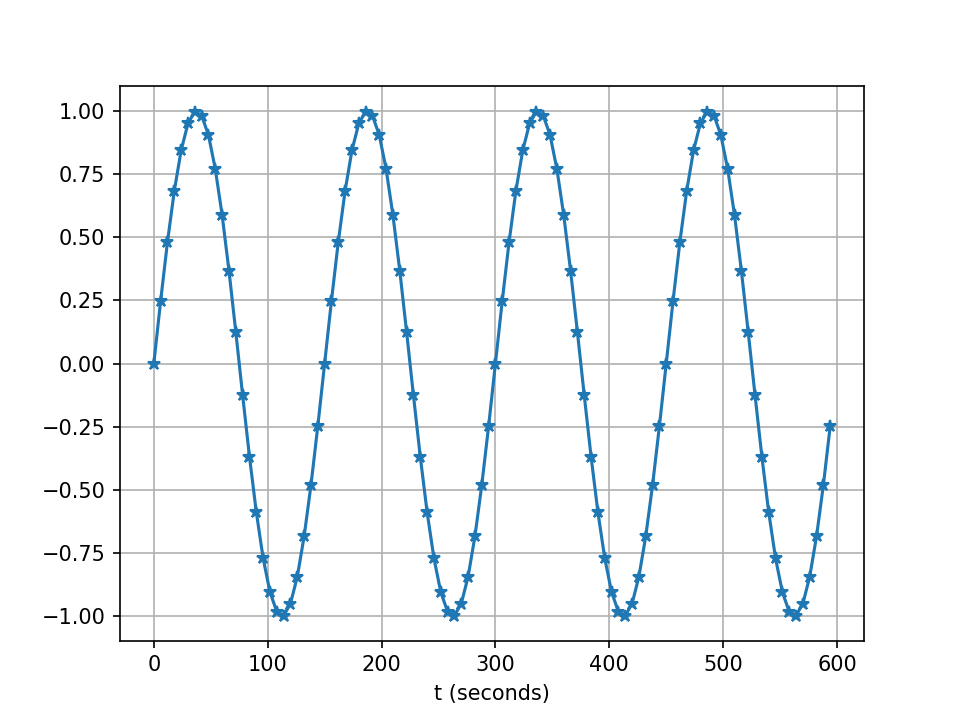

Text(0.5, 0, 't (seconds)')

In [6]:
# <COGINST>
fig, ax = plt.subplots()
ax.plot(t_samples, y_samples, marker="*")
ax.grid()
ax.set_xlabel("t (seconds)")
# </COGINST>

<!-- #region {"code_folding": [11]} -->
(1.4.4) Perform a real-valued DFT of the sampled wave-form, obtaining $c_{k}$.
How many Fourier-coefficients will be produced?
Verify that numpy's FFT (for real-valued signals), `np.fft.rfft`, returns the same results as your DFT;
you can use the function `numpy.allclose` to compare your array of coefficients with those produced by `np.fft.rfft`.
<!-- #endregion -->

In [8]:
# <COGINST>
complex_coeffs = py_dft(y_samples)
print(len(complex_coeffs) == N // 2 + 1)
print(N // 2 + 1)
print(np.allclose(complex_coeffs, np.fft.rfft(y_samples)))
# </COGINST>

True
51
True


(1.4.5) Recall that $k$ takes on integer values $0, 1, ..., \big\lfloor\frac{N}{2}\big\rfloor$.
Convert each $k$ value into frequency, $\nu_{k}$, with units of Hz. 

Similarly, $n$ takes on integer values: $0, 1, ..., N - 1$.
Convert $n$ into time, $t_{n}$, with units of seconds.

> 1.4.5 Solution: <COGINST>To convert to "physical" units: $t_n = \frac{n}{N}T$ and $\nu_{k} = \frac{k}{T}$.</COGINST>

In [10]:
# <COGINST>
# n-values: indicate which sample we are looking at
n = np.arange(N)

times = n / N * T  # units: seconds

# k-values: indicate which Fourier-component we are considering
k = np.arange(N // 2 + 1)

# converted to frequencies
# recall that exp(2*pi k/L * x) is a sinusoid with frequency k / T
freqs = k / T  # units: Hz
# </COGINST>

print(freqs)

[0.         0.00166667 0.00333333 0.005      0.00666667 0.00833333
 0.01       0.01166667 0.01333333 0.015      0.01666667 0.01833333
 0.02       0.02166667 0.02333333 0.025      0.02666667 0.02833333
 0.03       0.03166667 0.03333333 0.035      0.03666667 0.03833333
 0.04       0.04166667 0.04333333 0.045      0.04666667 0.04833333
 0.05       0.05166667 0.05333333 0.055      0.05666667 0.05833333
 0.06       0.06166667 0.06333333 0.065      0.06666667 0.06833333
 0.07       0.07166667 0.07333333 0.075      0.07666667 0.07833333
 0.08       0.08166667 0.08333333]


(1.4.6) What should the plot of $|a_{k}|$ vs $\nu_{k}$, look like, considering the form of the original signal that we sampled?

- Should there be one peak? Multiple peaks? 
- At what value(s) of $k$ should the peak(s) reside?
- What should the value(s) of $\varphi'_k$ at the peak(s) be? 

> 1.4.6 Solution: <COGINST>Because we are taking the DFT of a pure sinusoid, sampled over a periodic region, we expect the Fourier spectrum to consist of a single peak residing at the same frequency as the sinusoid.
>
>The coefficients should be zero for all $k$, except for $\nu_{k} = f = \frac{1}{150}\:\mathrm{Hz}$, which occurs at $\frac{k}{T} = \frac{1}{150\;\text{seconds}}\rightarrow k = \frac{600\;\text{seconds}}{150\;\text{seconds}} = 4 $.
> Thus we expect $|a_4| = 1$
>
> Because
> $\sin(2 \pi f t) = \cos\big(2 \pi f t - \frac{\pi}{2}\big)$
> we expect $\varphi'_4 = \frac{\pi}{2}$
></COGINST>


<!-- #region -->
Now, using $(c_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$, compute $(|a_k|)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$ and $(\varphi'_k)_{k=0}^{\left\lfloor \frac{N}{2} \right\rfloor}$.
Plot the Fourier spectrum $|a_{k}|$ vs $\nu_{k}$, along with a vertical line where you predict the peak to occur. Use the following _pseudocode_ to help you with your plot:

<IPython.core.display.Javascript object>


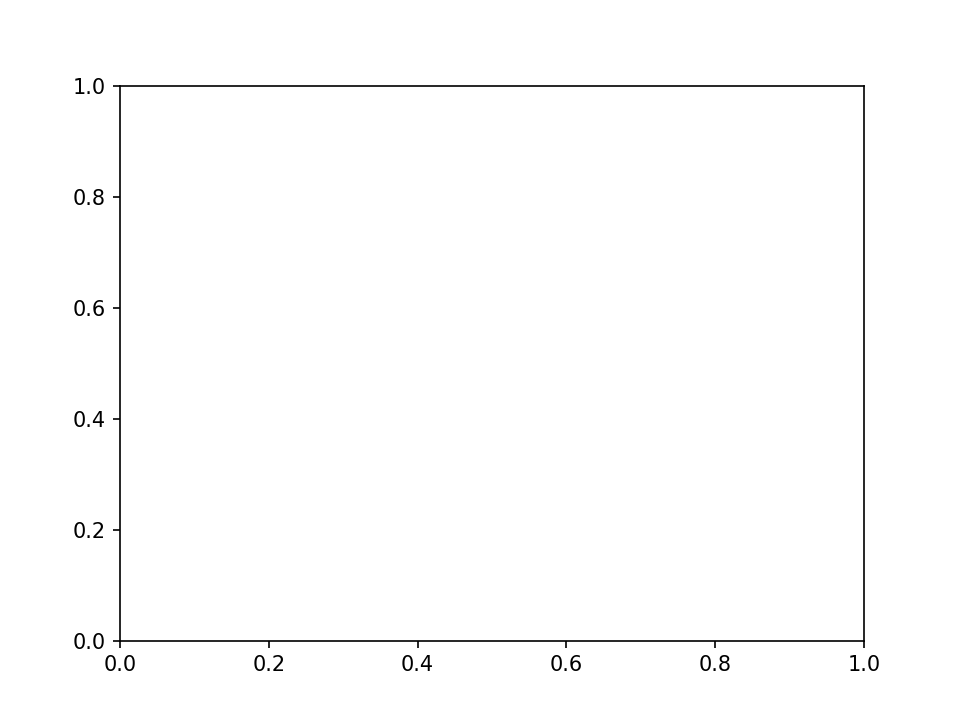

NameError: name 'amps' is not defined

In [12]:
fig, ax = plt.subplots()
expected_peak_freq = ???

# plots Fourier spectrum
ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)

# plots a vertical line at the frequency corresponding to our sine wave
ax.vlines(expected_peak_freq, 0, 1.0, lw=5, alpha=0.5, ls="--", color="black")

# make the plot look nice
ax.set_xlim(0, 0.03)
ax.grid(True)
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)");

<!-- #endregion -->

<IPython.core.display.Javascript object>


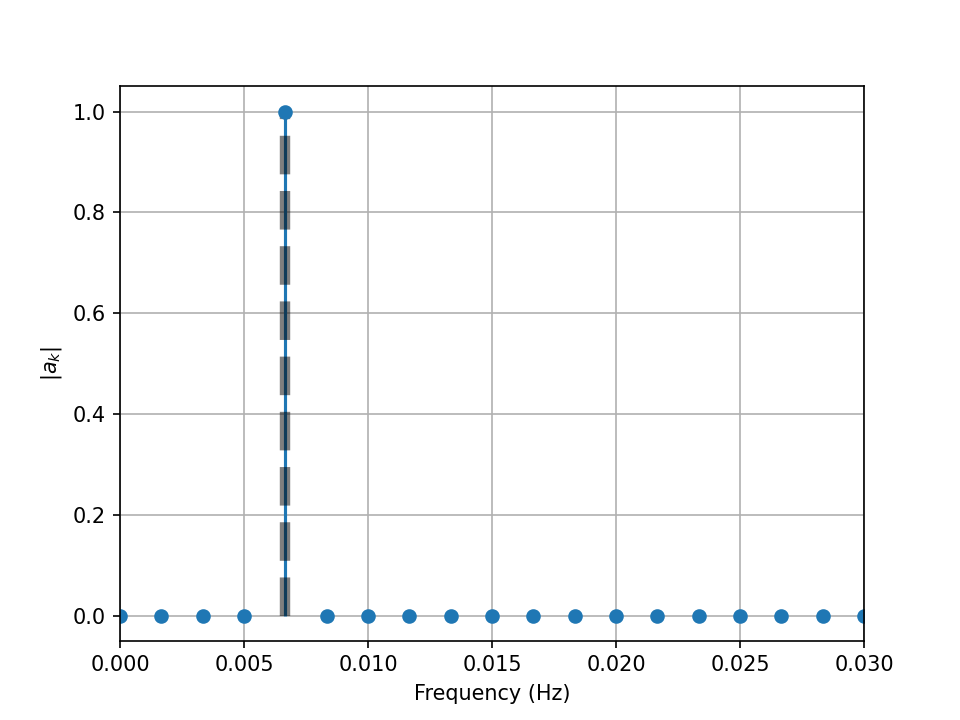

True True


In [13]:
# <COGINST>
def fourier_complex_to_real(
    complex_coeffs: np.ndarray, N: int
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Converts complex-valued Fourier coefficients (of 
    real-valued data) to the associated amplitudes and 
    phase-shifts of the real-valued sinusoids
    
    Parameters
    ----------
    complex_coeffs : numpy.ndarray, shape-(N//2 + 1,)
        The complex valued Fourier coefficients for k=0, 1, ...
    
    N : int
        The number of samples that the DFT was performed on.
    
    Returns
    -------
    Tuple[numpy.ndarray, numpy.ndarray]
        (amplitudes, phase-shifts)
        Two real-valued, shape-(N//2 + 1,) arrays
    """
    amplitudes = np.abs(complex_coeffs) / N

    # |a_k| = 2 |c_k| / N for all k except for
    # k=0 and k=N/2 (only if N is even)
    # where |a_k| = |c_k| / N
    amplitudes[1 : (-1 if N % 2 == 0 else None)] *= 2

    phases = np.arctan2(-complex_coeffs.imag, complex_coeffs.real)
    return amplitudes, phases


fig, ax = plt.subplots()
amps, phases = fourier_complex_to_real(complex_coeffs, N)

kpeak = round(T * f)
print(np.isclose(amps[kpeak], 1), np.isclose(phases[kpeak], np.pi / 2))

ax.stem(freqs, amps, basefmt=" ", use_line_collection=True)
ax.set_xlim(0, 0.03)

expected_peak_freq = f
ax.vlines(expected_peak_freq, 0, 1.0, lw=5, alpha=0.5, ls="--", color="black")
ax.grid()
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)");
# </COGINST>

<!-- #region -->
The peak-valued coefficient, $c_{k_{\text{peak}}}$, should be the only non-zero coefficient.
What is this telling us?
This says that the samples of our pure sinusoid is described by the following summation (inverse DFT) where all but two of the terms are zero:

\begin{align}
\sin(2\pi t_n) &= \frac{1}{N}\sum_{k=0}^{N-1}{c_{k}e^{i 2\pi\frac{k}{T}t_n}} = 0\;+ ... + \frac{1}{N} c_{k_{\text{peak}}}e^{i 2 \pi f t_n} + 0\;+ ... +\; \frac{1}{N} c^{*}_{k_{\text{peak}}}e^{-i 2 \pi f t_n};\;\; n \in [0, 1, \dots, N-1]\\
&= \frac{1}{N}(c_{k_{\text{peak}}}e^{i 2\pi\frac{k_{\text{peak}}}{T}t_n} + c^{*}_{k_{\text{peak}}}e^{-i 2\pi\frac{k_{\text{peak}}}{T}t_n});\;\; n \in [0, 1, \dots, N-1]
\end{align}

Earlier, we rewrote $\sin(2\pi t)$ in terms of complex-valued exponentials; let's rewrite the left side of this equation – $\sin(2\pi t_n)$ — in the same way

\begin{equation}
\sin(2\pi t_n) = \frac{1}{2i}e^{i 2 \pi f t_n} + \frac{-1}{2i}e^{-i 2 \pi f t_n}
\end{equation}


Given that these two expressions are equal, we have:
\begin{equation}
\frac{1}{2i}e^{i 2 \pi f t_n} + \frac{-1}{2i}e^{-i 2 \pi f t_n} = \frac{1}{N}(c_{k_{\text{peak}}}e^{i 2\pi\frac{k_{\text{peak}}}{T}t_n} + c^{*}_{k_{\text{peak}}}e^{-i 2\pi\frac{k_{\text{peak}}}{T}t_n});\;\; n \in [0, 1, \dots, N-1]
\end{equation}


(1.4.7) Given this expression, what should $c_{k_{\text{peak}}}$ be equal to? What should $k_{\text{peak}}$ be equal to? 

Verify that the values for $c_{k_{\text{peak}}}$ and $k_{\text{peak}}$ produced by your DFT match the values that you predict.
<!-- #endregion -->

> 1.4.5 Solution: <COGINST>We expect that $c_{k_{\text{peak}}} = \frac{N}{2i} = -\frac{iN}{2}$ and $k_{\text{peak}} = Tf = 4$</COGINST>

In [14]:
# <COGINST>
# k-peak should be the nearest integer to f*T, since freq = k/T,
# and the frequency of our sampled wave it f

print(f"k_peak = 4: {np.argmax(np.abs(complex_coeffs)) == 4}")
print(f"cpeak = -i/2: {np.isclose(complex_coeffs[round(T*f)]/N, -1j/2)}")

# the imaginary value is nearly -0.5i = 1 / (2i)
# the real value is almost zero
# </COGINST>

k_peak = 4: True
cpeak = -i/2: True


(1.4.8) Use `np.fft.irfft` to compute the *exact* inverse DFT and verify that it recovers the original sampled data.

In [15]:
np.allclose(np.fft.irfft(complex_coeffs, n=len(y_samples)), y_samples) # <COGLINE>

True

(1.4.9) Return to the "Audio Signals Basics" notebook and copy the code that you used to sample and plot the major triad:

 - $523.25\;\mathrm{Hz}$ (C)
 - $659.25\;\mathrm{Hz}$ (E)
 - $783.99\;\mathrm{Hz}$ (G)
 
where each pure tone has an amplitude of $1\:\mathrm{Pascal}$.


Sample $0.5$ seconds of this analog signal using a sample rate of $2000\;\mathrm{Hz}$.
Take the discrete Fourier transform of the resulting digital signal. Plot the magnitudes of the Fourier coefficients as a function of frequency: $|a_{k}|$ vs $\nu_{k}$.
What are the significance of the peaks that you see?
What information does this plot provide us with that a plot of the wave form doesn't?

Are these peaks "perfect" as we saw above? I.e. are they confined to individual $k$-values or do they have a "thickness" across multiple $k$-values?
What might be a cause for this phenomenon?

Use `ax.set_xlim(400, 1000)` to limit the x-values plotted to be between $400\;\mathrm{Hz}$ and $1000\;\mathrm{Hz}$.

<IPython.core.display.Javascript object>


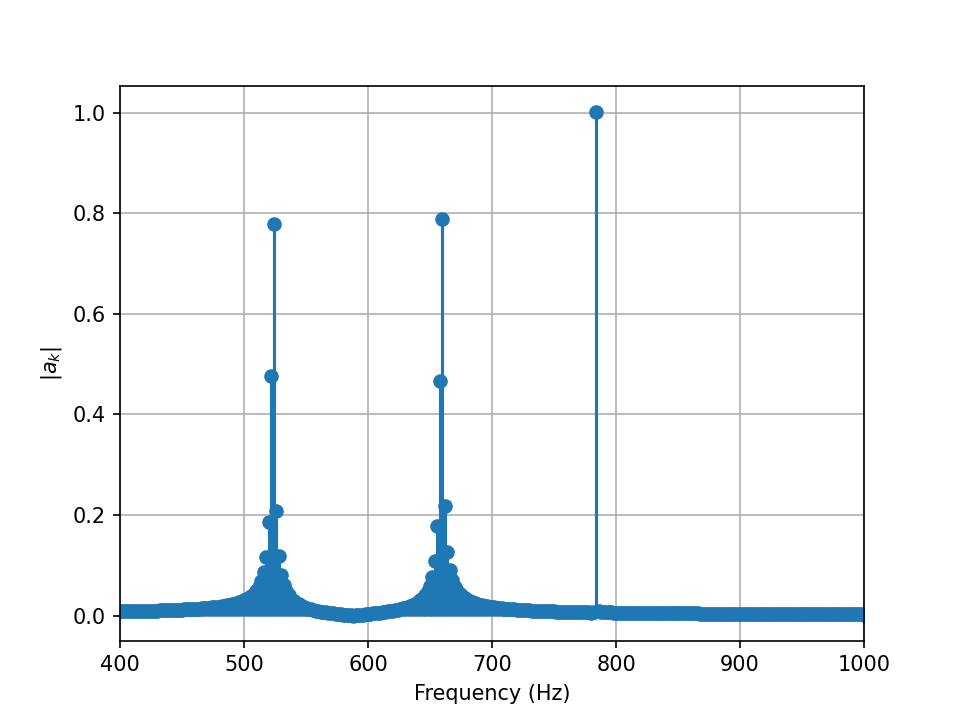

In [16]:
# <COGINST>
def p(t: np.ndarray, A: Union[int, float], f: Union[int, float]) -> np.ndarray:
    return A * np.sin(2 * np.pi * f * t)


# sampling 0.5 seconds at 2000 HZ
T = 0.5  # seconds
N = int(0.5 * 2000)  # number of samples
t = np.arange(N) * (T / N)  # the samples, in seconds
triad = p(t, 1, 523.25) + p(t, 1, 659.25) + p(t, 1, 783.99)  # digital signal

# k-values
k = np.arange(N // 2 + 1)

# converted to frequencies
v = k / T  # units: Hz

fourier_triad = np.fft.rfft(triad)  # fourier coefficients
triad_amps, triad_phases = fourier_complex_to_real(fourier_triad, N)

# plotting |ak| vs vk

fig, ax = plt.subplots()

ax.stem(v, triad_amps, basefmt=" ", use_line_collection=True)
ax.set_xlim(0, 0.03)
ax.set_xlim(400, 1000)
ax.set_ylabel(r"$| a_{k} |$")
ax.set_xlabel("Frequency (Hz)")
ax.grid(True)
# </COGINST>